In [1]:
import Get_Wind_Matching
import os
%matplotlib inline

## Extract the US wind and dump them in a zip file (Linux only)

In [5]:
# This block can only run on a Linux Machine
Get_Wind_Matching.DecodeWind()

A24522-201310.pgb.f00
A24351-201301.pgb.f00
A24560-201312.pgb.f00
A24370-201302.pgb.f00
A24389-201303.pgb.f00
A24446-201306.pgb.f00
A24541-201311.pgb.f00
A24503-201309.pgb.f00
A24408-201304.pgb.f00
A24484-201308.pgb.f00
A24465-201307.pgb.f00
A24427-201305.pgb.f00


## Construct the class for further matching purpose (LInux and Windows are both ok)
### If it is the first time you run the code, please use the first block below. If you have already run it before, you can set the parameter Wind_Preload to True and use the second block.

In [5]:
# For the first time run
WindClass = Get_Wind_Matching.WindMatching('IAH', 'BOS', 2013, Wind_Preload=False,file_location_dict = {'u_wind':'u_wind.p', 
                                                                                     'v_wind': 'v_wind.p', 
                                                                                     'TimeIdxTree': 'TimeIdxTree.p', 
                                                                                     'Grid_LonLat_Tree':'Grid_LonLat_Tree.p',
                                                                                     'Levels': 'Levels.p',
                                                                                     'wind_file': os.getcwd() + '/WIND_NCAR/NCAR_wind.zip',
                                                                                     'grid_file': os.getcwd() + '/WIND_NCAR/LonLat_Grid.p'})



---------------- Preparing wind data and constructing kd-trees----------------
Files dumped to %s /home/liuyulin101/Desktop/wind2
Finished
Finished
---------------- Load Trajectories ----------------


In [2]:
# If it is not the first time run, please use the following
# WindClass = Get_Wind_Matching.WindMatching('IAH', 'BOS', 2013, Wind_Preload=True)

---------------- Preload preprocessed wind files ----------------
Finished
Finished
---------------- Load Trajectories ----------------


## Wind Visualization

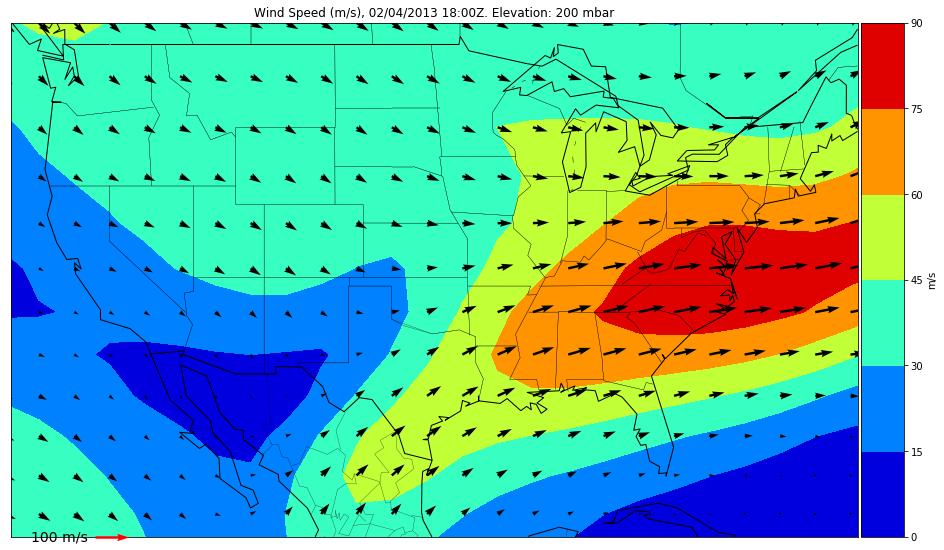

In [3]:
z_wind = WindClass.VisualizeWind(AirPressure = 200, Time = '02/04/2013 18:00', Scale = 2500)

## Matching

In [4]:
mean_wind_sp, wind_dist_nm, matched_headwind, matched_wind_dist, matched_u_wind, matched_u_wind = WindClass.Matching()

---------------- Start horizontal spatial matching----------------
---------------- Prepare for temporal matching ----------------
0 1.9311904907226562e-05
500 0.04680371284484863
1000 0.09435796737670898
1500 0.14378857612609863
---------------- Start temporal matching----------------
---------------- Start vertical spatial matching----------------
(1679, 873)
(1679, 873)
---------------- Finilize matching and reshaping ----------------


## Merge with MNL file (MA_MNL_DEPARR_YEAR.CSV)

In [93]:
MNL = WindClass.MergeWithMNL(Overwrite=False)
# If you want to save the file with the same name, you can set Overwrite to True.
# If you want to use the new MNL file to run the model, you should set Overwite to True